# PAD-UFES-20 dataset analysis
In this kernel, we performe some EDA for the PAD-UFES-20 dataset. For more information, please refer to the paper.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/home/patcha/Datasets/PAD-UFES-20/metadata.csv")
data_ = data.replace({'True': 'YES', 'False': 'NO', True: 'YES', False: 'NO'})

# Stats

Getting the number of samples for each diagnosis and the % of biopsy-proven

In [2]:
grouped = data.groupby(['diagnostic'])

total = 0
total_bio = 0
for g in grouped:
    print("-"*10)
    print("Diagnostic:", g[0])
    g = g[1]
    _total = len(g)
    _total_bio = len(g[g['biopsed']])
    print("# of samples:", _total)
    print("% biopsed:", 100 * (_total_bio/_total))
    print("-"*10)
    total += _total
    total_bio += _total_bio
    
print("*"*10)
print("# Total:", total)
print("% biopsed:", 100 * (total_bio/total))
    

----------
Diagnostic: ACK
# of samples: 730
% biopsed: 24.383561643835616
----------
----------
Diagnostic: BCC
# of samples: 845
% biopsed: 100.0
----------
----------
Diagnostic: MEL
# of samples: 52
% biopsed: 100.0
----------
----------
Diagnostic: NEV
# of samples: 244
% biopsed: 24.59016393442623
----------
----------
Diagnostic: SCC
# of samples: 192
% biopsed: 100.0
----------
----------
Diagnostic: SEK
# of samples: 235
% biopsed: 6.382978723404255
----------
**********
# Total: 2298
% biopsed: 58.39860748476936


# Age distribution
Checking the age distribution for all patients and splitted by gender

<Figure size 432x288 with 0 Axes>

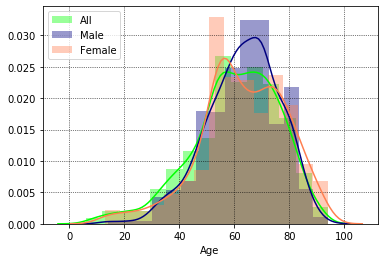

<Figure size 432x288 with 0 Axes>

In [4]:
kde = True
male = data[ data['gender'] == 'MALE' ]
female = data[ data['gender'] == 'FEMALE' ]


sns.distplot(data['age'], color="lime", label='All', kde=kde, bins=15)
sns.distplot(male['age'], color="navy", label='Male', kde=kde, bins=15)
sns.distplot(female['age'], color="coral", label='Female', kde=kde, bins=15)
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Age")
plt.legend(['All', 'Male', 'Female'], loc='upper left')
plt.savefig("figures/age_distribution.png", dpi=200)
plt.figure()


# Age boxplots

Checking the age bloxplots per diagnostic

<Figure size 432x288 with 0 Axes>

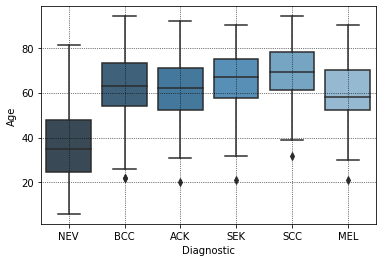

<Figure size 432x288 with 0 Axes>

In [5]:
sns.boxplot(y='age', x='diagnostic', data=data, palette="Blues_d")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Diagnostic")
plt.ylabel("Age")
plt.savefig("figures/age_boxplot.png", dpi=200)
plt.figure()


# Gender

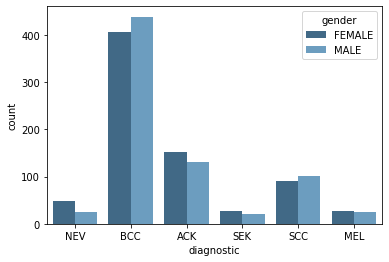

In [6]:
x = sns.countplot(x="diagnostic", hue="gender", data=data, palette="Blues_d")
plt.savefig('figures/gender_per_diag.png', dpi = 200)

# Fitspatrick

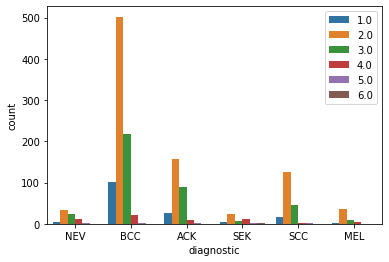

In [18]:
x = sns.countplot(x="diagnostic", hue="fitspatrick", data=data)
plt.legend(loc='upper right')
plt.savefig('figures/fitspatrick.png', dpi = 200)

# Anatomical region
Checking the frequency of each anatomical region per diagnostic

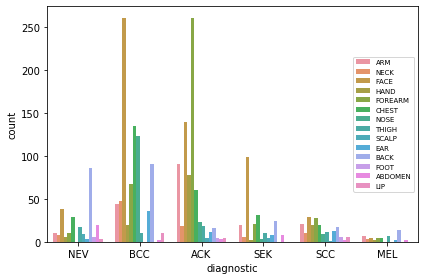

In [4]:
x = sns.countplot(x="diagnostic", hue="region", data=data)
plt.legend(loc='right', prop={'size': 7})
plt.tight_layout()
plt.savefig('figures/regions_per_diag.png', dpi = 200)

Checking the frequency of each anatomical region

<Figure size 432x288 with 0 Axes>

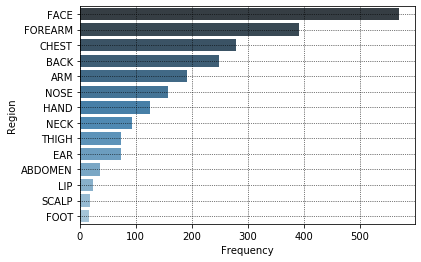

<Figure size 432x288 with 0 Axes>

In [8]:
x = data.groupby(['region']).count()['diagnostic'].sort_values(ascending=False)
sns.barplot(x.values, x.index, palette="Blues_d", orient='h')
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Frequency")
plt.ylabel("Region")
plt.tight_layout()
plt.savefig("figures/region_frequency.png", dpi=200)
plt.figure()


# Family background

Father:

<Figure size 432x288 with 0 Axes>

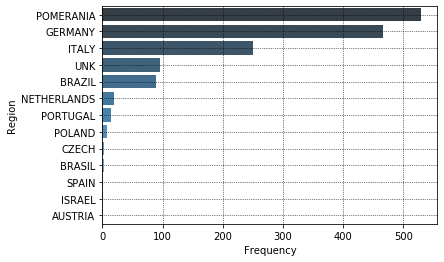

<Figure size 432x288 with 0 Axes>

In [9]:
x = data.groupby(['background_father']).count()['diagnostic'].sort_values(ascending=False)
sns.barplot(x.values, x.index, palette="Blues_d", orient='h')
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Frequency")
plt.ylabel("Region")
plt.savefig("figures/fam_back_father_frequency.png", dpi=200)
plt.figure()

Mother:

<Figure size 432x288 with 0 Axes>

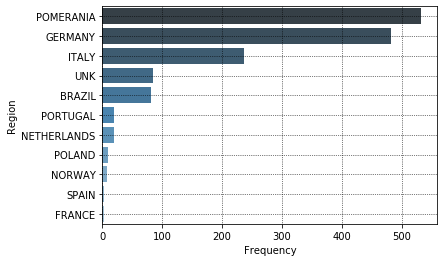

<Figure size 432x288 with 0 Axes>

In [10]:
x = data.groupby(['background_mother']).count()['diagnostic'].sort_values(ascending=False)
sns.barplot(x.values, x.index, palette="Blues_d", orient='h')
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Frequency")
plt.ylabel("Region")
plt.savefig("figures/fam_back_mother_frequency.png", dpi=200)
plt.figure()

# Diameters

<Figure size 432x288 with 0 Axes>

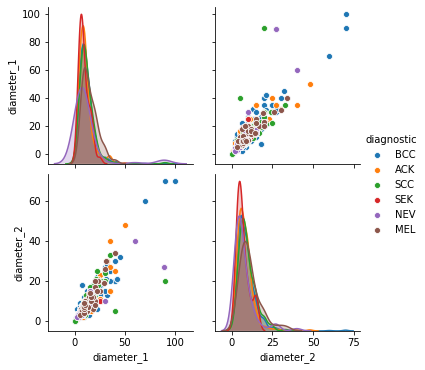

<Figure size 432x288 with 0 Axes>

In [11]:
diam = data.dropna(subset = ['diameter_1', 'diameter_2'])
diam = diam[['diameter_1', 'diameter_2', 'diagnostic']]
g = sns.pairplot(diam, hue="diagnostic")
plt.savefig("figures/diameters.png", dpi=200)
plt.figure()

# Boolean features

/home/patcha/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/patcha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


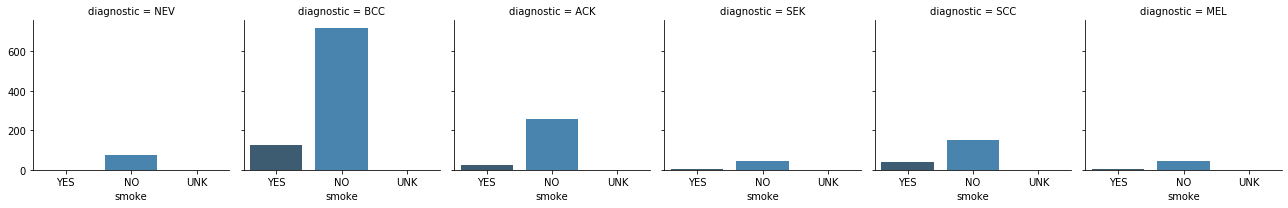

<Figure size 432x288 with 0 Axes>

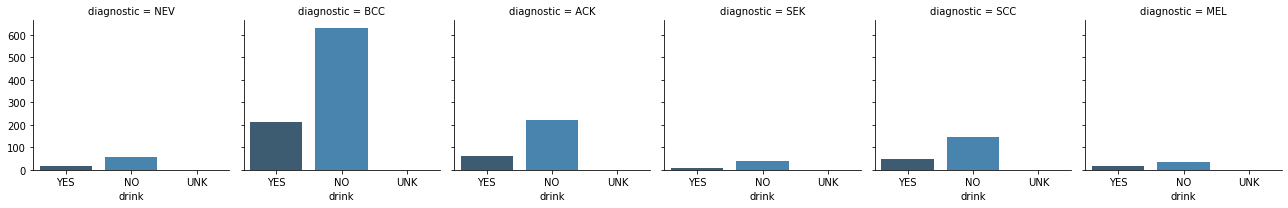

<Figure size 432x288 with 0 Axes>

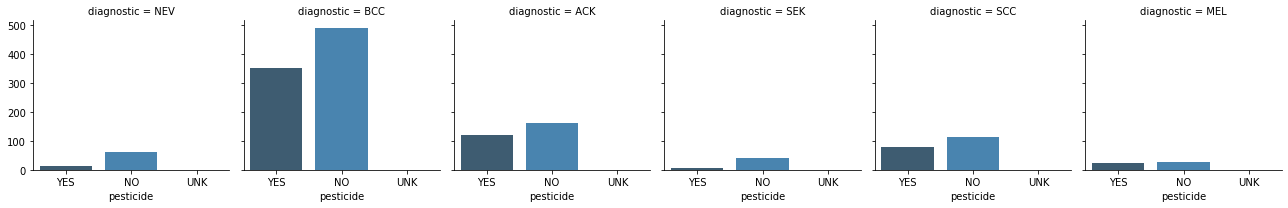

<Figure size 432x288 with 0 Axes>

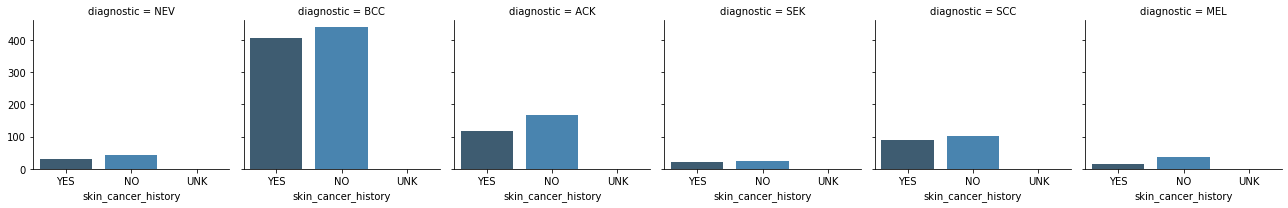

<Figure size 432x288 with 0 Axes>

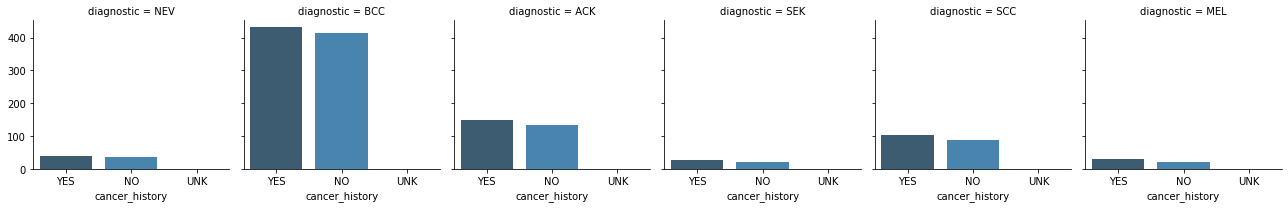

<Figure size 432x288 with 0 Axes>

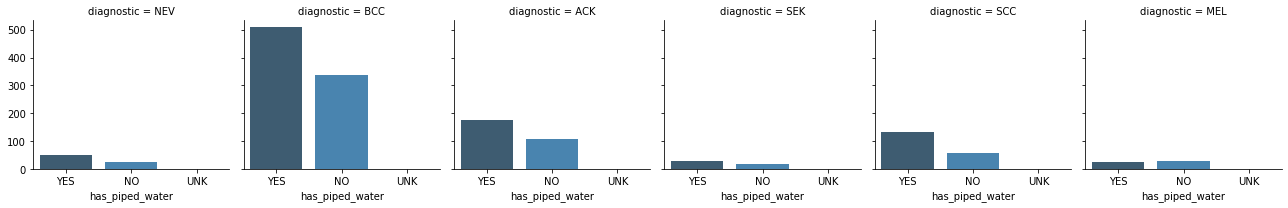

<Figure size 432x288 with 0 Axes>

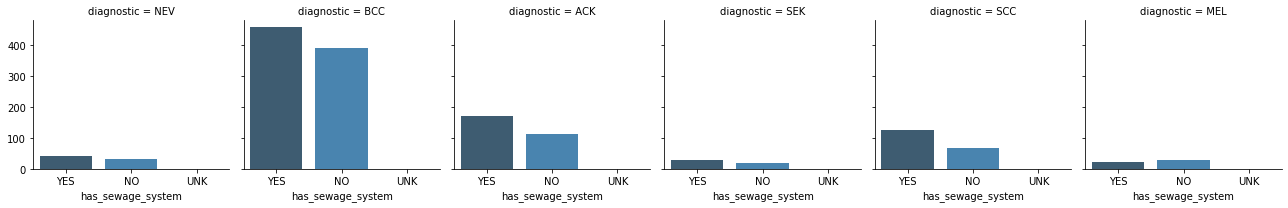

<Figure size 432x288 with 0 Axes>

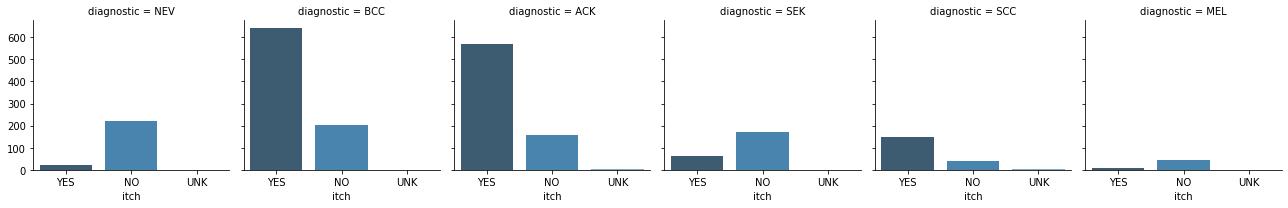

<Figure size 432x288 with 0 Axes>

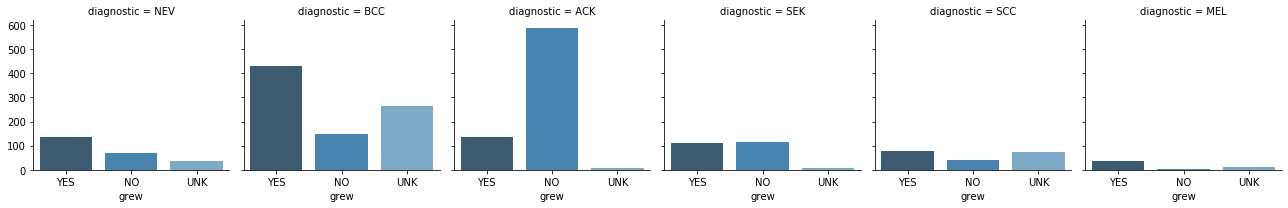

<Figure size 432x288 with 0 Axes>

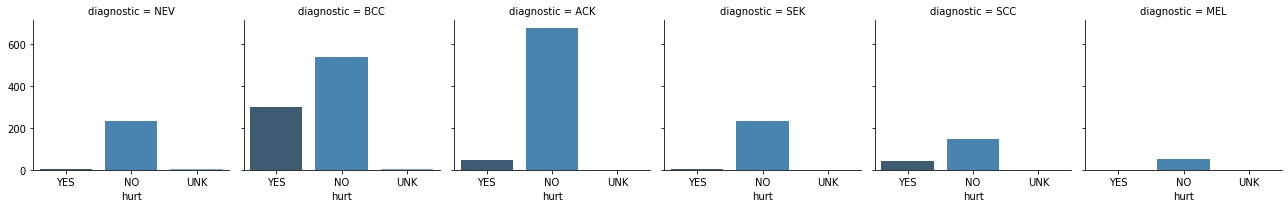

<Figure size 432x288 with 0 Axes>

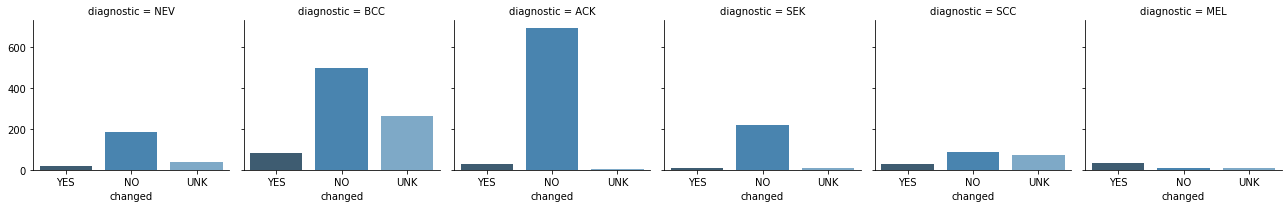

<Figure size 432x288 with 0 Axes>

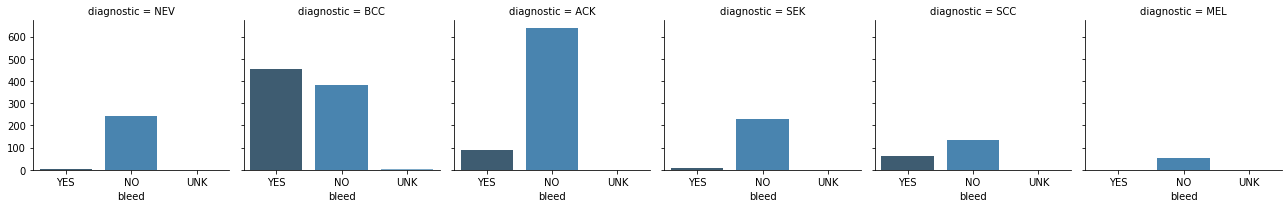

<Figure size 432x288 with 0 Axes>

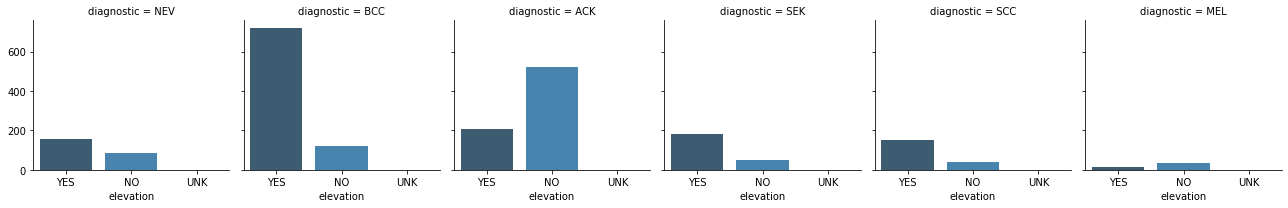

<Figure size 432x288 with 0 Axes>

In [12]:
_feats = ['smoke', 'drink', 'pesticide', 'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation']

def plot_count (_feat):    
    sub_data = data_[[_feat, 'diagnostic']]            
    g = sns.FacetGrid(sub_data, col="diagnostic")    
    g.map(sns.countplot, _feat, order=['YES', 'NO', 'UNK'], palette="Blues_d")       
    g.savefig("figures/count_{}.png".format(_feat), dpi=200)    
    plt.figure()


for _feat in _feats:
    plot_count(_feat)
    


### Solo plots

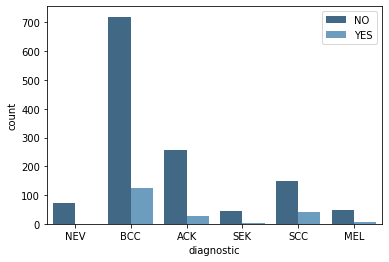

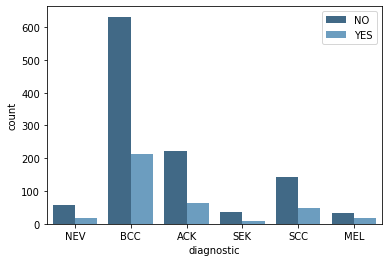

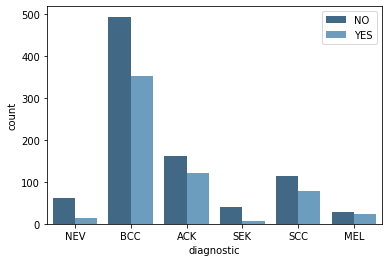

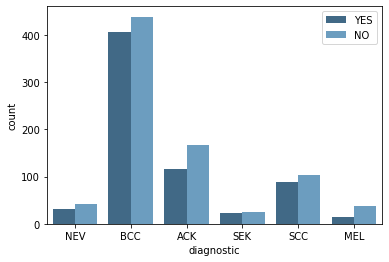

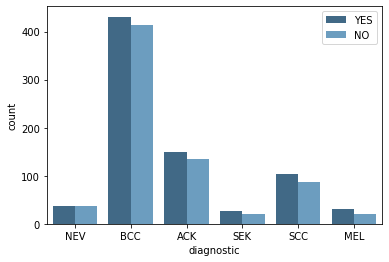

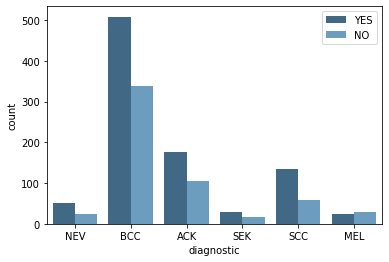

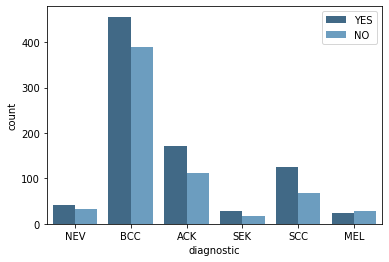

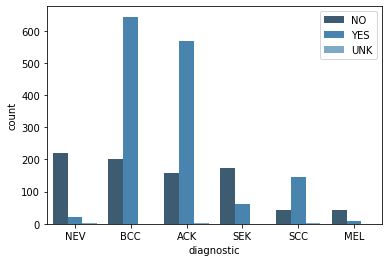

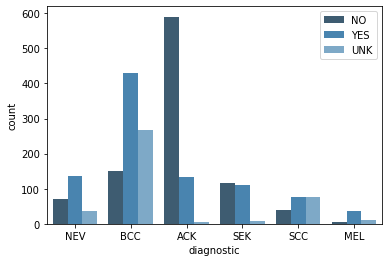

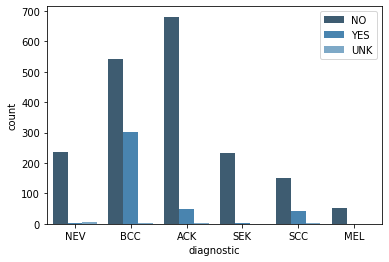

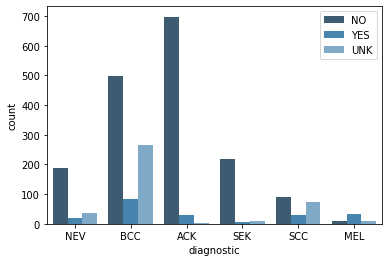

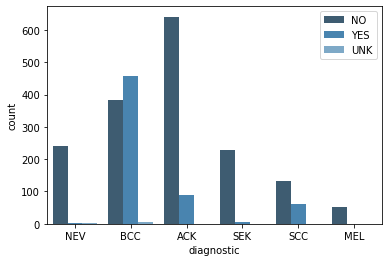

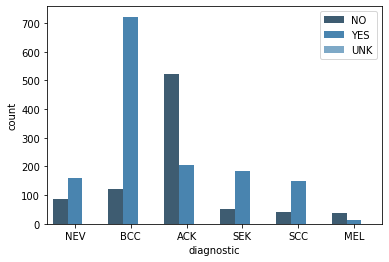

<Figure size 432x288 with 0 Axes>

In [13]:
def solo_plot_count (_feat):    
    g = sns.countplot(x="diagnostic", hue=_feat, data=data_, palette="Blues_d")
    plt.savefig('figures/solo_count_{}.png'.format(_feat), dpi = 200)
    plt.legend(loc='upper right')
    plt.figure()
    
for _feat in _feats:
    solo_plot_count(_feat)